In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Contents:
 ## Load and summarize data
 ## Process data
 ## Visualize data
 ## Assess data correlations
 ## Further analysis
 
 
 

# Load and summarize data

In [2]:
file = "googleplaystore.csv"

In [3]:
def load_dataset():
    return pd.read_csv(file)

In [4]:
dataset = load_dataset()

In [5]:
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [6]:
def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)

    print("\nFirst 10 rows of dataset")
    print(dataset.head(10))

    print("\nStatistical summary:")
    print(dataset.describe())

In [7]:
print_summarize_dataset(dataset)

Dataset dimension:
(10841, 13)

First 10 rows of dataset
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0  

# Process data

In [8]:
data_orig = dataset.copy()

In [9]:
def clean_dataset(dataset):
    dataset = dataset.dropna(
        axis=0, thresh=dataset.shape[1]
    )  # drop rows with NaN values if they exist in any column
    return dataset

In [10]:
dataset = clean_dataset(dataset)

In [11]:
print(dataset.shape)

(9360, 13)


In [12]:
def conv_size_cell(cell):
    if type(cell) == str:
        if "M" in cell:
            return 10**6 * float(cell.replace("M", ""))
        elif "k" in cell:
            return 10**3 * float(cell.replace("k", ""))
        else:
            return np.nan
    else:
        return cell


def conv_size_col(col):
    for i in range(len(col)):
        col.iloc[i] = conv_size_cell(col.iloc[i])
    return col


def conv_cols(dataset):
    # cols = ["Rating", "Reviews", "Size", "Installs"]
    dataset["Rating"] = dataset["Rating"].astype(float)
    dataset["Reviews"] = dataset["Reviews"].astype(float)
    dataset["Size"] = conv_size_col(dataset["Size"]).astype(float)
    dataset["Installs"] = (
        dataset["Installs"]
        .replace("\+", "", regex=True)
        .replace(",", "", regex=True)
        .astype(float)
    )
    dataset["Price"] = (
        dataset["Price"].astype(str).replace("\$", "", regex=True).astype(float)
    )
    return dataset

In [13]:
dataset = conv_cols(dataset)

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

In [14]:
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600000.0,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000000.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600000.0,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Visualize data

In [15]:
def print_histograms(dataset):
    # plt.figure(figsize=(15, 12))
    dataset.hist(layout=(2, 3), log=True, figsize=(12, 9))
    plt.yscale("log")
    plt.show()

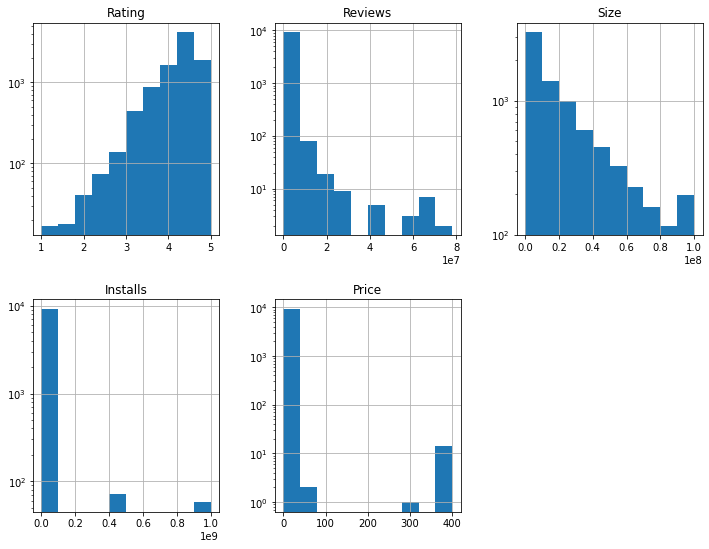

In [16]:
print_histograms(dataset)

# Assess data correlations

In [17]:
def compute_correlations_matrix(dataset):
    return dataset.corr()

In [18]:
numerical_cols = ["Rating", "Reviews", "Size", "Installs", "Price"]
compute_correlations_matrix(dataset[numerical_cols])

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068133,0.083640,0.051337,-0.021919
Reviews,0.068133,1.000000,0.240382,0.641605,-0.009824
Size,0.083640,0.240382,1.000000,0.162707,-0.026272
Installs,0.051337,0.641605,0.162707,1.000000,-0.011895
Price,-0.021919,-0.009824,-0.026272,-0.011895,1.000000


In [19]:
def print_scatter_matrix():
    scatter_matrix(dataset[numerical_cols], figsize=(9, 9))
    plt.show()

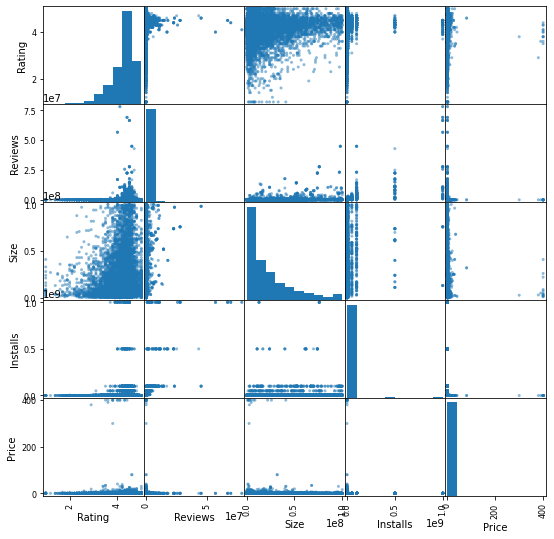

In [20]:
print_scatter_matrix()

# Further analysis

## Paid apps of Family category popularity

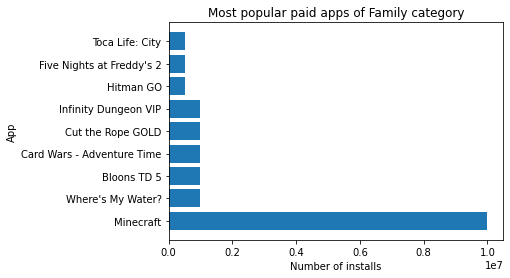

In [21]:
def pop_family_apps_bar(dataset):
    paid_apps = dataset[(dataset["Category"] == "FAMILY") & (dataset["Type"] == "Paid")]
    pop_paid_apps = paid_apps.sort_values("Installs", ascending=False).head(10)
    plt.barh(pop_paid_apps["App"], pop_paid_apps["Installs"])
    plt.title("Most popular paid apps of Family category")
    plt.xlabel("Number of installs")
    plt.ylabel("App")
    plt.show()


pop_family_apps_bar(dataset)

## Popularity of paid family apps by genre

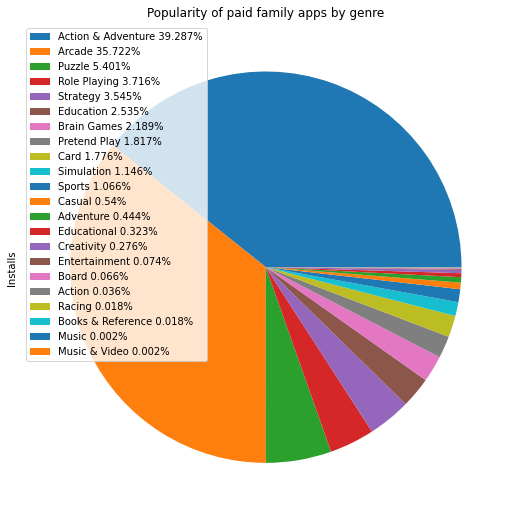

In [22]:
def pop_family_genres_pie(dataset):
    paid_apps = dataset[(dataset["Category"] == "FAMILY") & (dataset["Type"] == "Paid")]

    installations_per_genre = {}

    for i in range(len(paid_apps)):
        genres = paid_apps["Genres"].iloc[i].split(";")
        installs = paid_apps["Installs"].iloc[i]
        for genre in genres:
            if genre not in installations_per_genre.keys():
                installations_per_genre[genre] = installs
            else:
                installations_per_genre[genre] += installs

    installations_per_genre = pd.DataFrame(
        installations_per_genre.items(), columns=["Genres", "Installs"]
    ).sort_values("Installs", ascending=False)

    installations_per_genre["Percentages"] = round(
        100
        * installations_per_genre["Installs"]
        / installations_per_genre["Installs"].sum(),
        3,
    ).astype(str)
    installations_per_genre["Genres with percentages"] = (
        installations_per_genre["Genres"]
        + " "
        + installations_per_genre["Percentages"]
        + "%"
    )

    installations_per_genre.plot.pie(
        y="Installs", labels=None, autopct=None, figsize=(12, 9)
    )
    plt.legend(labels=installations_per_genre["Genres with percentages"])
    plt.title("Popularity of paid family apps by genre")
    plt.show()


pop_family_genres_pie(dataset)

## Number of installation per category

In [23]:
def inst_per_cat(dataset):
    dataset.loc[:, "Installs"] = (
        dataset["Installs"]
        .replace("\+", "", regex=True)
        .replace(",", "", regex=True)
        .astype(int)
    )
    return dataset.groupby("Category")["Installs"].sum().sort_values(ascending=False)


# inst_per_cat(dataset)

## Installations per category visualized

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


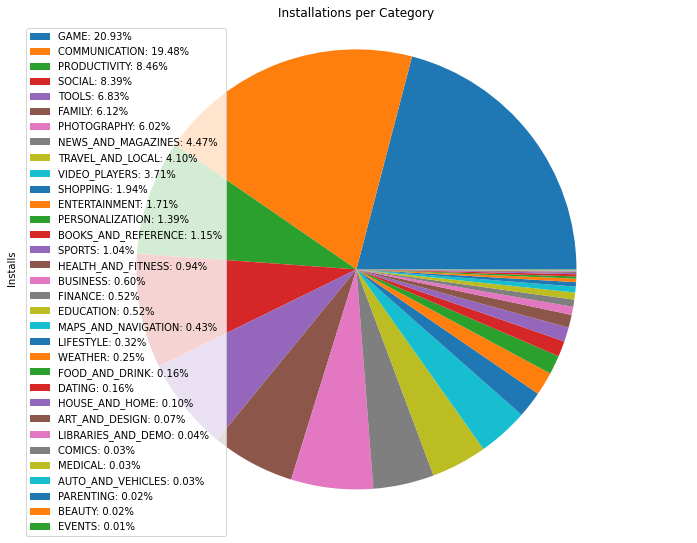

In [24]:
installs_per_category = inst_per_cat(dataset)


def inst_per_cat_pie(installs_per_category):
    installs_per_category.plot.pie(labels=None, figsize=(12, 9))

    percentage = [
        (100 * value / sum(installs_per_category)) for value in installs_per_category
    ]

    leg_labels = [
        f"{category}: {percent:.2f}%"
        for category, percent in zip(installs_per_category.index, percentage)
    ]

    plt.legend(labels=leg_labels)
    plt.title("Installations per Category")
    plt.axis("equal")
    plt.show()


inst_per_cat_pie(installs_per_category)

## Mean price per category

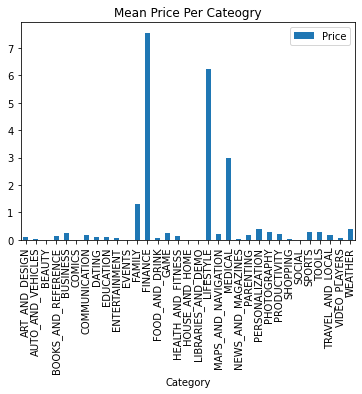

In [25]:
def plot_mean_price_per_category(dataset):
    dataset[["Category", "Price"]].groupby("Category").mean().plot.bar()
    plt.title("Mean Price Per Cateogry")
    plt.show()


plot_mean_price_per_category(dataset)

## Most expensive apps per category

In [26]:
def most_exp_apps(dataset):
    return (
        dataset[["Category", "App", "Price"]]
        .groupby("Category")
        .apply(lambda x: x.nlargest(1, columns="Price"))
        .reset_index(drop=True)
        .sort_values(by=["Category", "Price"], ascending=[True, False])
    )


most_exp_apps(dataset)

,Category,App,Price
0,ART_AND_DESIGN,"X Launcher Pro: PhoneX Theme, OS11 Control Center",1.99
1,AUTO_AND_VEHICLES,Ulysse Speedometer Pro,1.99
2,BEAUTY,Hush - Beauty for Everyone,0.00
3,BOOKS_AND_REFERENCE,Officiel du SCRABBLE LAROUSSE,4.60
4,BUSINESS,SkyTest BU/GU Lite,17.99
5,COMICS,LINE WEBTOON - Free Comics,0.00
6,COMMUNICATION,K-@ Mail Pro - Email App,4.99
7,DATING,AMBW Dating App: Asian Men Black Women Interra...,7.99
8,EDUCATION,Fuzzy Numbers: Pre-K Number Foundation,5.99
9,ENTERTAINMENT,My Talking Pet,4.99


## Mean price of apps per category

In [27]:
def get_data(dataset, category):
    # Get price data by category 
    cat_apps = dataset.loc[dataset["Category"] == category]
    paid_apps = cat_apps.loc[dataset["Price"] > 0].sort_values("Price", ascending=False)
    mean_price = round(cat_apps["Price"].mean(), 2)
    print("Category: ", category)
    print("Total number of apps: ", len(cat_apps))
    print("Total number of paid apps: ", len(paid_apps))
    print("Average price: ", mean_price)

In [28]:
cats = ["FINANCE", "LIFESTYLE", "MEDICAL", "FAMILY"]

for cat in cats:
    get_data(dataset, cat)
    print("\n")

Category:  FINANCE
Total number of apps:  323
Total number of paid apps:  13
Average price:  7.55


Category:  LIFESTYLE
Total number of apps:  314
Total number of paid apps:  18
Average price:  6.24


Category:  MEDICAL
Total number of apps:  350
Total number of paid apps:  88
Average price:  2.98


Category:  FAMILY
Total number of apps:  1746
Total number of paid apps:  161
Average price:  1.31


